In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

### 1. Data Preparation

In [126]:
# Load the dataset
credit_df = pd.read_csv('CC GENERAL.csv')
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2. Exploratory Data Analysis (EDA)

**Drop the CUST_ID column which does not add any information for our EDA**

In [127]:
credit_data = credit_df.drop(columns = "CUST_ID").copy()
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Check the columns in the dataset**

In [128]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

The dataset now contains only int and float data, which will not require any transformation to be used by the models we are going to create

**Check for NaN values**

In [129]:
credit_data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We observe that the 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' columns contain null values.

**Check the distribution of the data**

In [130]:
plt.style.use("seaborn-v0_8-deep")

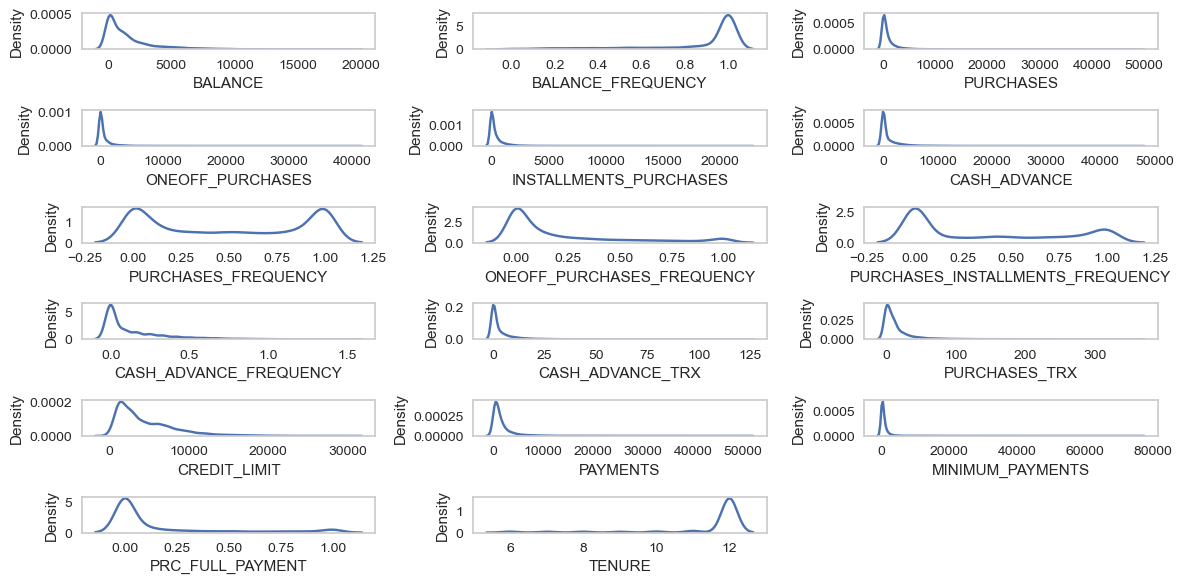

In [131]:
plt.figure(figsize = (12,6))
plt.title("Credit Data Dsitributions")
rows=6
cols=3
it=1
for i in credit_data.columns:
    plt.subplot(rows, cols,it)
    sns.kdeplot(credit_data[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

The data is generally right skewed, except for 'PURCHASES_FREQUENCY' column where the tail is skewed to the left. This indicates that lower amounts across all columns for exaple purchases, cash advances, credit limits, etc.

'TENURE' is the only left-skewed column in the dataset. 

**Check for outliers in the dataset**

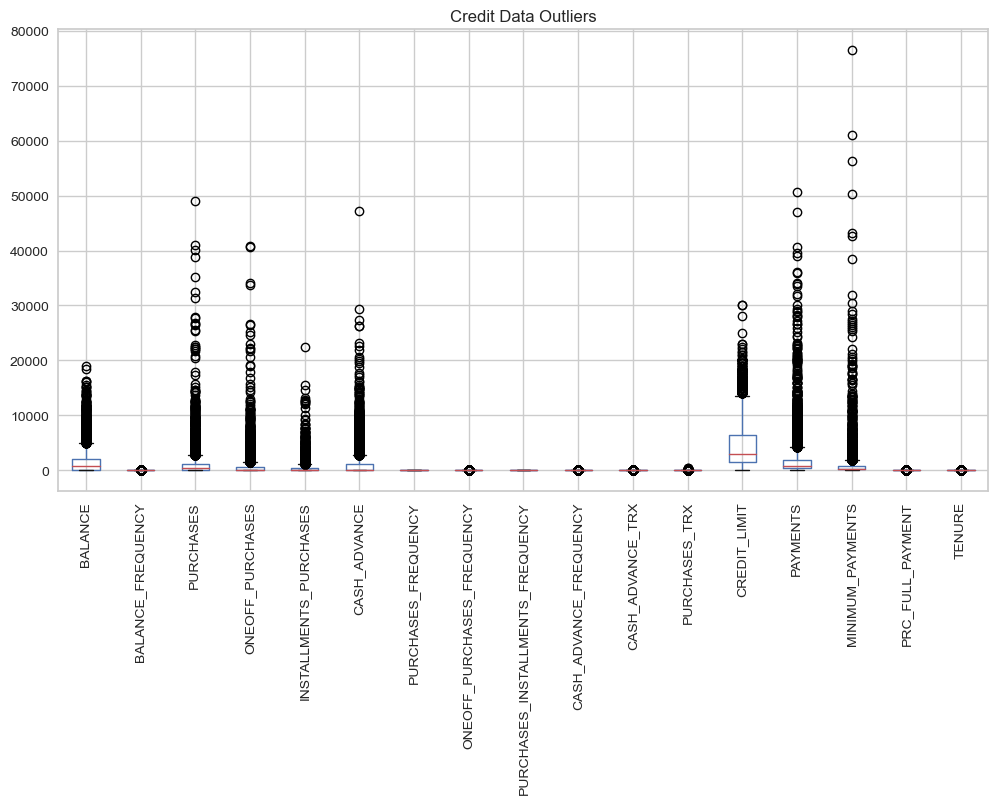

In [132]:
plt.figure(figsize = (12,6))
plt.title("Credit Data Outliers")
credit_data.boxplot()
plt.xticks(rotation=90)
plt.show()

The 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS' and 'MINIMUM_PAYMENTS' columns contain outliers. This indicates that some customers are transacting with signitficantly larger amounts than the general customer base.

### 3. Preprocessing

**Handle NaN values**

In [133]:
# Check for the range of values in the MINIMUM PAYMENTS column
credit_data[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]].describe()

,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8637.000000,8949.000000
mean,864.206542,4494.449450
std,2372.446607,3638.815725
min,0.019163,50.000000
25%,169.123707,1600.000000
50%,312.343947,3000.000000
75%,825.485459,6500.000000
max,76406.207520,30000.000000


In [134]:
# Handle NaN values using imputation
credit_data[["MINIMUM_PAYMENTS"]] = credit_data[["MINIMUM_PAYMENTS"]].fillna(credit_data[["MINIMUM_PAYMENTS"]].mean())
credit_data[["CREDIT_LIMIT"]] = credit_data[["CREDIT_LIMIT"]].fillna(credit_data[["CREDIT_LIMIT"]].mean())

# Check for NaN values again
credit_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

First, I checked the 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' columns using the describe() function to check the statistics in both columns. Understanding the mean, standard deviations and percentile statistics helps us determine whether imputation is the best approach to handle the NaN values.

This was confirmed, and I proceeded to handle Nan values using imputation with the mean values for each column.

**Scale the data in the dataset**

In [135]:
# Check the columns before scaling
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [136]:
# Scalre the data
scaler = StandardScaler()
credit_data_standardized = credit_data.copy()
credit_data_standardized[credit_data_standardized.columns] = scaler.fit_transform(
    credit_data_standardized[credit_data_standardized.columns])

# Check the columns after scaling
credit_data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


### 4. Unsupervised model creation and evaluation

**Create the KMeans Classification Model**

In [137]:
# Initialize the model
kmeans_clf = KMeans(n_clusters=5, n_init=10, random_state=42, max_iter=300)

# Create the cluster labels
cluster_labels = kmeans_clf.fit_predict(credit_data_standardized)
credit_data_standardized["Clusters"] = cluster_labels

credit_data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,4
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0


**Use PCA to reduce dimensionality and allow us to plot the clusters**

In [138]:
# Initialize the PCA model
pca = PCA(n_components = 2, whiten = False)

# Fit and transform the standardized dataset
credit_pca = pca.fit_transform(credit_data_standardized)
credit_pca = pd.DataFrame(data=credit_pca, columns=["PCA One", "PCA Two"])
credit_pca["Clusters"]= cluster_labels

credit_pca.head()

,PCA One,PCA Two,Clusters
0,-2.328950,-0.756221,0
1,0.324804,2.965956,3
2,2.264035,-0.100709,4
3,-1.462764,0.030118,0
4,-2.174714,-0.409099,0


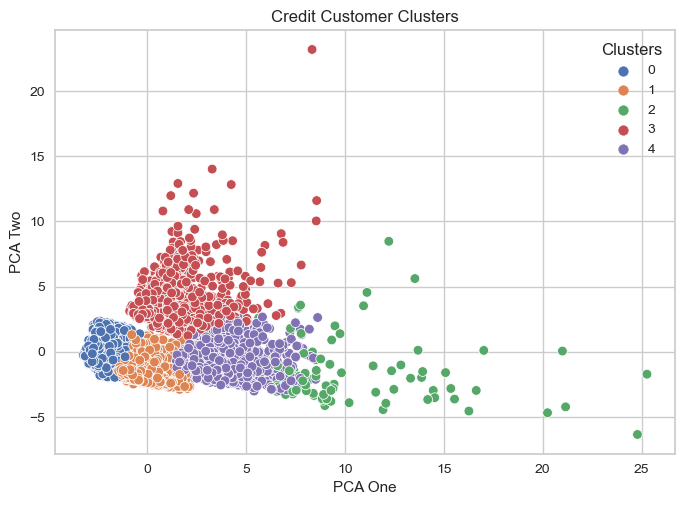

In [139]:
# Plot the clusters
plt.title("Credit Customer Clusters")
sns.scatterplot(x="PCA One", y="PCA Two", hue="Clusters", data=credit_pca, palette="deep")
plt.show()

**Evaulate the KMeans model**

<u>a) Silhouette Score evaluation</u>

The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [140]:
# Print the silhouette score
s_score = silhouette_score(credit_pca, kmeans_clf.labels_)
print(f"Silhouette score : {s_score}")

Silhouette score : 0.5178776640663447


The unsupervised KMeans model has a good silhouette score of approximately 0.52. This indicates that the clusters formed by the model are on average well-separated, and the data points within each cluster are relatively close to each other compared to points in other clusters. This suggests a reasonable degree of cluster cohesion and separation, showing that our model can correctly identify the underlying patterns in the data

<u>b) Calinski and Harabasz Score evaluation</u>

This is also known as the Variance Ratio Criterion. The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. A high CH means better clustering since observations in each cluster are closer together (more dense), while clusters themselves are further away from each other (well separated)

In [141]:
# Print the Calinski and Harabasz score
ch_score = calinski_harabasz_score(credit_pca, kmeans_clf.labels_)
print(f"Calinski and Harabasz score : {ch_score}")

Calinski and Harabasz score : 10374.52558045833


The unsupervised KMeans model has a Calinski and Harabasz score of 10374. This suggests that the clusters formed by the model have a high degree of separation and compactness. Our score indicates strong cluster structures, showing that our model can correctly identify the underlying patterns in the data

**Creating and saving labelled dataset**

In [144]:
# Add the cluster labels as a column to the main dataframe
credit_df["Customer Cluster"] = cluster_labels
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Customer Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [145]:
# Save the dataframe into a CSV file
credit_df.to_csv('spiwan-cc-labeled.csv', index=False)

### 5. Supervised model creation and evaluation: